第一個例子

In [ ]:
import json
import requests
import pandas as pd 
import pyecharts.options as opts
from pyecharts.charts import *
from pyecharts.globals import ThemeType #设定主题
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ChartType

In [ ]:
import chardet
import jieba

In [3]:
os.chdir(sys.path[0])
# getcwd返回的路径不好用
print("当前路径 -> %s" % os.getcwd())

当前路径 -> /home/quant/myWork/tsalab/tools


In [5]:
df1 = pd.read_excel(r'../data/2021年8月全国各地主要城市空气质量指数.xlsx')
df1.head(2)

,省,城市,日期,质量等级,AQI指数,当天AQI排名,PM2.5,PM10,So2,No2,Co,O3
0,河北,石家庄,2021-08-01,良,51,277,28,48,3,11,0.72,104
1,河北,石家庄,2021-08-02,优,41,186,12,35,4,21,0.50,83


In [6]:
timeline = Timeline(init_opts=opts.InitOpts(width='1000px',height='700px'))
for i in range(1,32):
    if i < 10:
        data = df1[df1['日期'] == f'2021-08-0{i}']
    else:
        data = df1[df1['日期'] == f'2021-08-{i}']
    data = data.sort_values(by=['PM2.5', 'PM10'], ascending=[False, False])[:30]
    pm_25 = data['PM2.5'].tolist()
    pm_10 = data['PM10'].tolist()
    So2 = data['So2'].tolist()
    No2 = data['No2'].tolist()
        

    bar = (
        Bar()
        .add_xaxis(data['城市'].tolist())
        .add_yaxis('PM2.5',pm_25,stack='stack1')
        .add_yaxis('PM10',pm_10,stack='stack1')
        .add_yaxis('So2',So2,stack='stack1')
        .add_yaxis('No2',No2,stack='stack1')
        .reversal_axis() 
        .set_series_opts(    # 系列配置项
                label_opts=opts.LabelOpts(position="inside"))
        .set_global_opts(    # 全局配置项
            xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(is_show=False),
            axisline_opts=opts.AxisLineOpts(is_show=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),),
            legend_opts = opts.LegendOpts(pos_top="5%",)
            )
        )

    timeline.add(bar,str(i)+'日')
timeline.add_schema(
    play_interval=1500,          # 轮播速度
    is_timeline_show=True,     # 是否显示 timeline 组件
    is_auto_play=True,          # 是否自动播放
    pos_left="0",
    pos_right="0"
)
timeline.render_notebook()

第二個例子

In [16]:
import numpy as np
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import *
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType
from pyecharts.components import Table
from pyecharts.options import ComponentTitleOpts
import datetime
from pyg2plot import Plot,JS
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data_7 = pd.read_excel(r'../data/全国未来7天天气原始数据.xlsx')
data_7.sample(5)

,地区,日期,星期,省/直辖市,城市,白天天气现象,白天风向,白天风力,白天最高气温,晚间天气现象,晚间风向,晚间风力,晚间最高气温
478,华北,2月26日,周六,内蒙古,巴彦淖尔,晴,西风,3-4级,6,晴,西风,3-4级,-8
346,华北,2月25日,周五,北京,海淀,晴,南风,<3级,13,多云,北风,<3级,-2
3184,西南,2月26日,周六,云南,普洱,阴,西南风,<3级,23,多云,南风,<3级,13
1834,华南,2月21日,周一,海南,海口,小雨,东北风,3-4级,11,小雨,无持续风向,<3级,9
665,东北,2月25日,周五,黑龙江,牡丹江,晴,西南风,3-4级,4,晴,西南风,<3级,-10


In [18]:
data_40 = pd.read_excel(r'../data/全国各城市近40天天气原始数据.xlsx')
data_40.head(2)

,日期,星期,省/直辖市,城市,降水概率,历史均值最高气温,历史均值最低气温,实况高温,实况低温,预估高温,预估低温
0,20220130,日,北京,北京,0%,2,-6,NaN,NaN,NaN,NaN
1,20220131,一,北京,北京,0%,4,-5,NaN,NaN,NaN,NaN


In [19]:
data_7['白天最高气温'] = data_7['白天最高气温'].astype('int')
data_7['晚间最高气温'] = data_7['晚间最高气温'].astype('int')

data_40["日期"] = data_40["日期"].astype('str')
data_40["历史均值最高气温"] = data_40["历史均值最高气温"].astype('int')
data_40["历史均值最低气温"] = data_40["历史均值最低气温"].astype('int')

data_40["月"] = data_40["日期"].apply(lambda x: str(x[4:6]))
data_40["日"] = data_40["日期"].apply(lambda x: str(x[6:]))

data_7_copy = data_7[["地区", "省/直辖市"]]
data_40_all = data_7_copy.merge(data_40, how="left", on="省/直辖市")
data_40_all = data_40_all[data_40_all["月"] == '02']
data_40_all_city = data_40_all.groupby(['地区', '日'], as_index=False)['历史均值最高气温', '历史均值最低气温', '实况高温', '实况低温', '预估高温', '预估低温'].mean()

/home/quant/miniconda3/envs/quant37/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [20]:
data_40_all_city.head(2)

,地区,日,历史均值最高气温,历史均值最低气温,实况高温,实况低温,预估高温,预估低温
0,东北,01,-7.593857,-19.505119,NaN,NaN,NaN,NaN
1,东北,02,-7.894198,-19.655290,NaN,NaN,NaN,NaN


In [21]:
def save_heat_map(data, weight, area, mode, title):
    """
    绘制热力图
    :return:
    """
    data_all = data.groupby([area, '日期'], as_index=False)[mode].mean()
    data_pivot = pd.pivot(data_all,
                          values=mode,
                          index=area,
                          columns='日期')
    data_pivot_all = data_pivot.astype('float')
    # 按照 索引年月倒序排序
    data_pivot_all.sort_index(ascending=False)
    # 设置全局默认字体 为 雅黑
    plt.rcParams['font.family'] = ['Microsoft YaHei']
    # 设置全局轴标签字典大小
    plt.rcParams["axes.labelsize"] = 14
    # 设置背景
    sns.set_style("darkgrid", {"font.family": ['Microsoft YaHei', 'SimHei']})
    # 设置画布长宽 和 dpi
    plt.figure(figsize=(20, weight), dpi=100)
    # 自定义色卡
    # cmap = mcolors.LinearSegmentedColormap.from_list("n",['#95B359','#D3CF63','#E0991D','#D96161','#A257D0','#7B1216'])
    # 绘制热力图
    ax = sns.heatmap(data_pivot_all,
                     cmap='YlGnBu',
                     vmax=int(max(data_all[mode].tolist())),
                     annot=True,  # 热力图上显示数值
                     linewidths=0.5,
                     )
    # 将x轴刻度放在最上面
    ax.xaxis.set_ticks_position('top')
    plt.title(title, fontsize=16)  # 图片标题文本和字体大小
    # plt.savefig(jpg_file)
    plt.show()

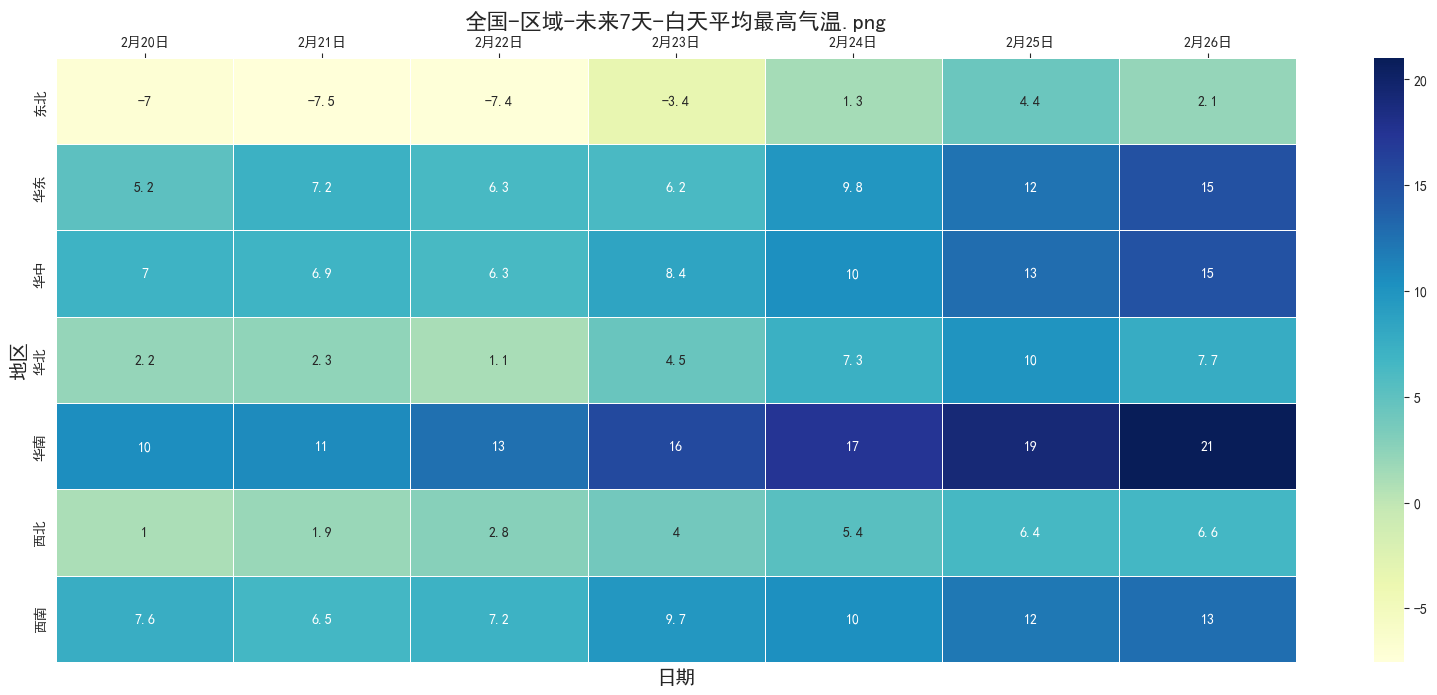

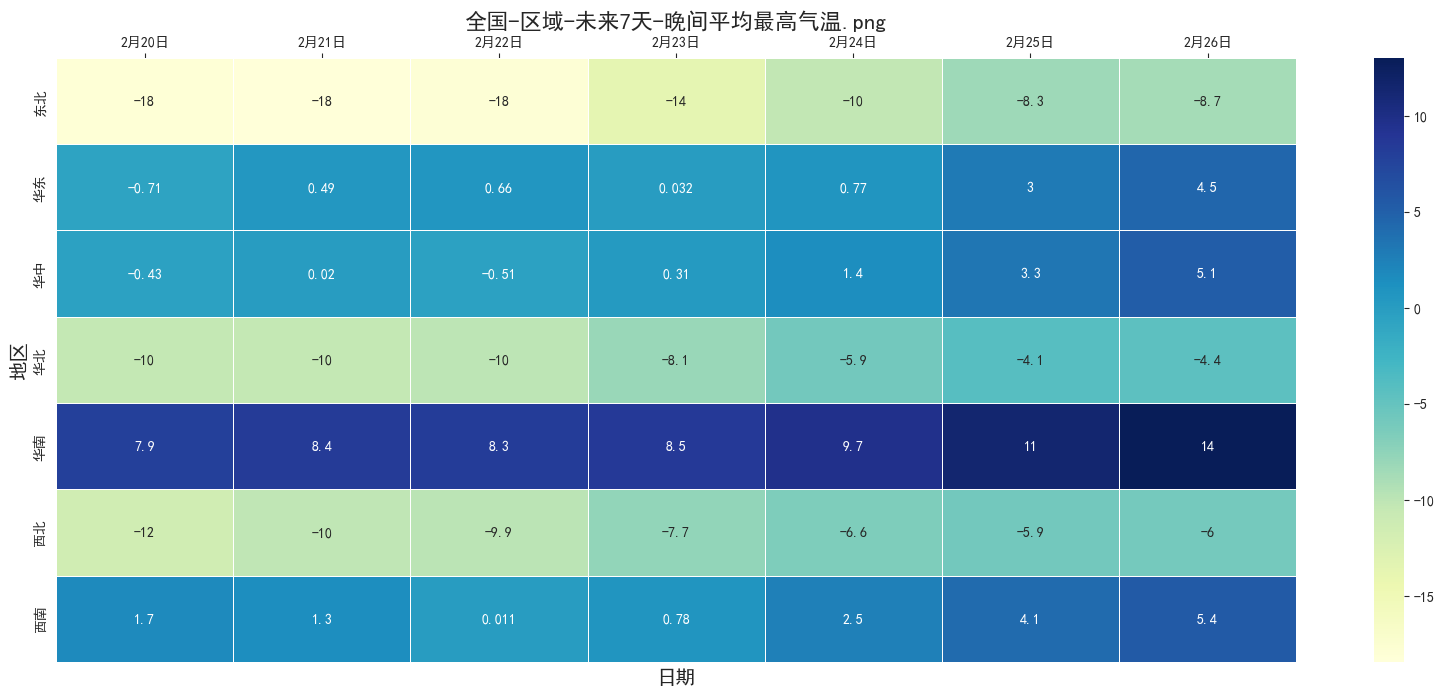

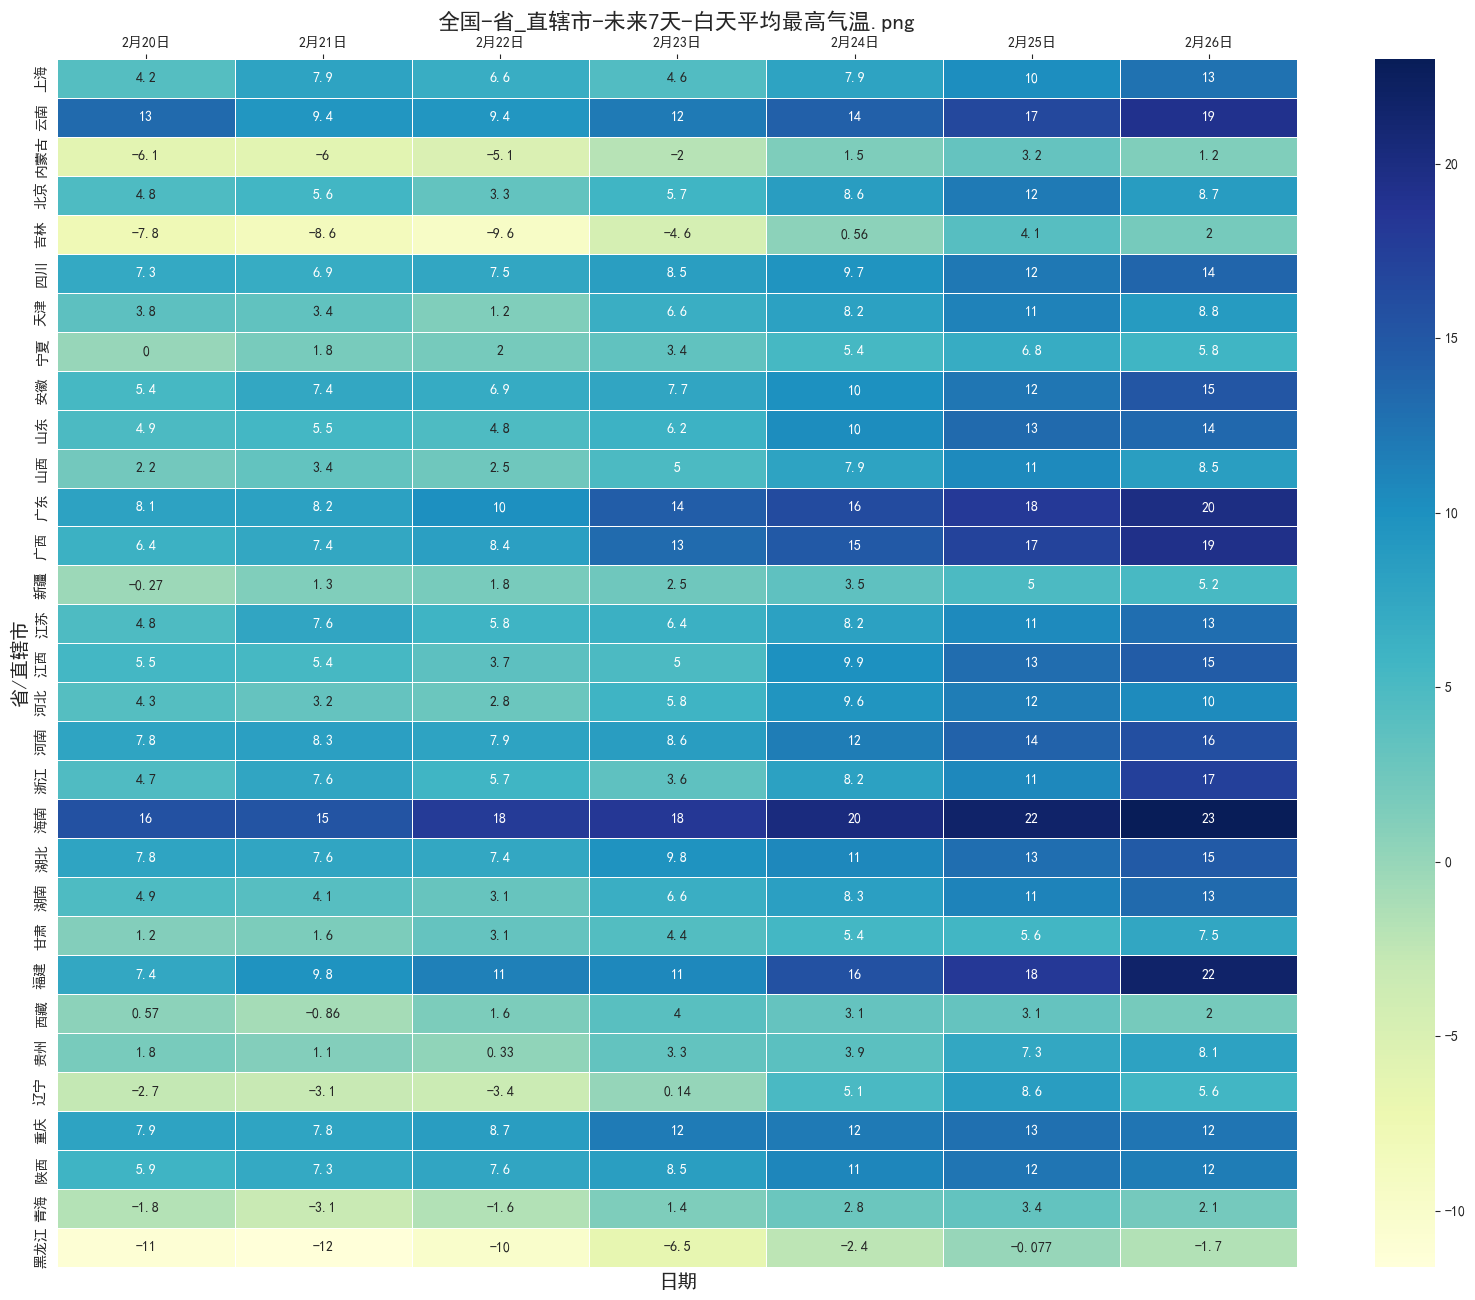

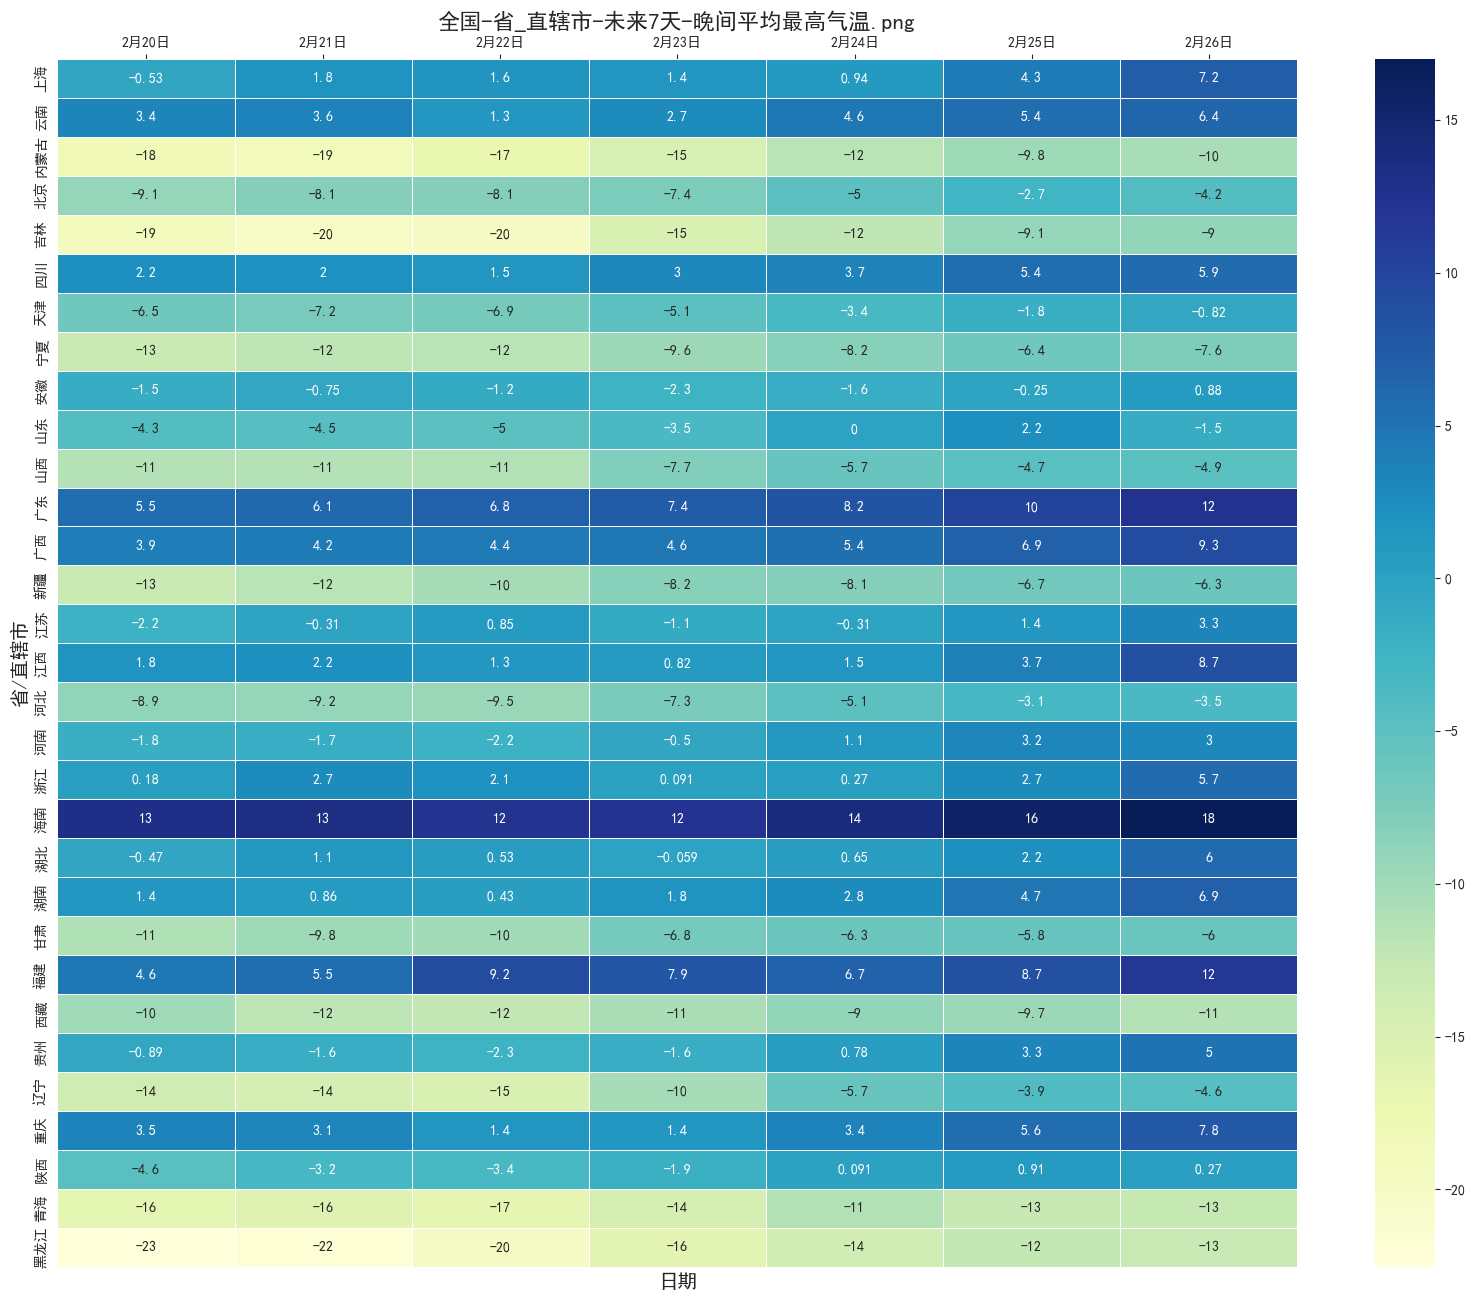

In [23]:
save_heat_map(data=data_7, weight=8, area='地区', mode='白天最高气温', title= '全国-区域-未来7天-白天平均最高气温.png')
save_heat_map(data=data_7, weight=8, area='地区', mode='晚间最高气温', title='全国-区域-未来7天-晚间平均最高气温.png')
save_heat_map(data=data_7, weight=16, area='省/直辖市', mode='白天最高气温', title='全国-省_直辖市-未来7天-白天平均最高气温.png')
save_heat_map(data=data_7, weight=16, area='省/直辖市', mode='晚间最高气温', title='全国-省_直辖市-未来7天-晚间平均最高气温.png')

In [24]:
def save_line_jpg(data, area):
    data_area = data[data["地区"] == area]

    line = (
        Line(init_opts=opts.InitOpts(width="1000px", height="500px", bg_color='#FFFFFF'))
            .add_xaxis(xaxis_data=data_area['日'].tolist())  # x轴
            .add_yaxis(
            series_name="历史均值高温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['历史均值最高气温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                                            offset: 0,
                                            color: '#fca087'
                                        }, {
                                            offset: 1,
                                            color: '#fca087'
                                        }], false)""", ),
                    "opacity": 0.7,
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": 'rgb(0, 160, 221)',
                }},
            linestyle_opts={
                'normal': {
                    'width': 3,
                    'curve': 0.5,
                    'color': '#fca087',
                    "type": "dashed"
                }
            },
            #         linestyle_opts=opts.LineStyleOpts(color="green", width=4, type_="dashed"),
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )
            .add_yaxis(
            series_name="历史均值低温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['历史均值最低气温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                    offset: 0,
                    color: '#7dd0e9'
                }, {
                    offset: 1,
                    color: '#7dd0e9'
                }], false)"""
                    ),
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": "rgb(0, 160, 221)",
                }
            },  # 标记的颜色
            linestyle_opts={
                'normal': {
                    'width': 3,
                    'curve': 0.5,
                    'color': '#7dd0e9',
                    "type": "dashed"
                }
            },
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )
            .add_yaxis(
            series_name="实况高温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['实况高温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                    offset: 0,
                    color: '#f7cf15'
                }, {
                    offset: 1,
                    color: '#f7cf15'
                }], false)"""
                    ),
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": "#1ad8ae",
                },
            },  # 标记的颜色
            linestyle_opts={
                'normal': {
                    'width': 3,
                    'curve': 0.5,
                    'color': '#f7cf15'
                }
            },
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )

            .add_yaxis(
            series_name="实况低温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['实况低温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                    offset: 0,
                    color: '#6495ED'
                }, {
                    offset: 1,
                    color: '#6495ED'
                }], false)"""
                    ),
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": "#1ad8ae",
                },
            },  # 标记的颜色
            linestyle_opts={
                'normal': {
                    'width': 3,
                    'curve': 0.5,
                    'color': '#6495ED'
                }
            },
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )
            .add_yaxis(
            series_name="预估高温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['预估高温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                    offset: 0,
                    color: '#fd5123'
                }, {
                    offset: 1,
                    color: '#fd5123'
                }], false)"""
                    ),
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": "#1ad8ae",
                },
            },  # 标记的颜色
            linestyle_opts={
                'normal': {
                    'width': 3,
                    'curve': 0.5,
                    'color': '#fd5123'
                }
            },
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )
            .add_yaxis(
            series_name="预估低温",  # 名称
            is_smooth=True,  # 线条样式  , 是否设置成圆滑曲线
            y_axis=data_area['预估低温'].tolist(),
            itemstyle_opts={
                "normal": {
                    "color": JsCode(
                        """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                    offset: 0,
                    color: '#4169E1'
                }, {
                    offset: 1,
                    color: '#4169E1'
                }], false)"""
                    ),
                    "barBorderRadius": [45, 45, 45, 45],
                    "shadowColor": "#1ad8ae",
                },
            },  # 标记的颜色
            linestyle_opts={
                'normal': {
                    'width': 3,
                    #                 'curve': 0.5,
                    'color': '#4169E1'
                }
            },
            label_opts=opts.LabelOpts(is_show=False),  # 显示数据标签
        )

            .set_global_opts(title_opts=opts.TitleOpts(title=f"{area}-2022年02月气温曲线",  # 标题
                                                       title_textstyle_opts=opts.TextStyleOpts(font_size=20),  # 主标题字体大小
                                                       subtitle="",  # 次坐标轴
                                                       pos_left='6%'),  # 标题位置
                             legend_opts=opts.LegendOpts(is_show=True,
                                                         pos_right='6%',
                                                         orient="horizontal",
                                                         ),  # 不显示图例
                             tooltip_opts=opts.TooltipOpts(
                                 trigger="axis",
                                 axis_pointer_type="shadow"
                             ),  # 提示框
                             xaxis_opts=opts.AxisOpts(name='',
                                                      type_='category',
                                                      axislabel_opts=opts.LabelOpts(rotate=360),
                                                      ),
                             yaxis_opts=opts.AxisOpts(type_="value",  # y轴类型
                                                      #                                               max_=20000,
                                                      name='',  # y轴名称
                                                      name_location='middle',  # y轴名称位置
                                                      name_gap=70,  # y轴名称距离轴线距离
                                                      axistick_opts=opts.AxisTickOpts(is_show=False),  # 刻度线
                                                      axisline_opts=opts.AxisLineOpts(is_show=False),  # y轴线
                                                      splitline_opts=opts.SplitLineOpts(is_show=True),  # y轴网格线
                                                      axislabel_opts=opts.LabelOpts(formatter="{value}")),  # 轴标签显示方式
                             )

    )
    # make_snapshot(snapshot, line.render(), jpg_file)
    return line

In [25]:
hb = save_line_jpg(data=data_40_all_city, area='华北')
hb.render_notebook()

In [26]:
db = save_line_jpg(data=data_40_all_city, area='东北')
db.render_notebook()

In [27]:
hd = save_line_jpg(data=data_40_all_city, area='华东')
hd.render_notebook()

In [28]:
xb = save_line_jpg(data=data_40_all_city, area='西北')
xb.render_notebook()

In [29]:
xn = save_line_jpg(data=data_40_all_city, area='西南')
xn.render_notebook()